#ASSIGNMENT - A6a
# **Time Series Analysis**

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 07/21/2024

The goal of this project is to analyze the historical stock prices of GOOGLE and perform various forecasting techniques to predict future stock prices. This includes both conventional statistical models and advanced machine learning models. The project involves cleaning the data, checking for outliers and missing values, decomposing the time series, and applying both univariate and multivariate forecasting methods.

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [5]:
import yfinance as yf

# Specify the ticker symbol for Google
ticker_symbol = "GOOGL"

# Download historical market data
data = yf.download(ticker_symbol, start="2021-01-01", end="2024-01-01")
data.reset_index(inplace=True)
print(data)

[*********************100%%**********************]  1 of 1 completed

          Date        Open        High         Low       Close   Adj Close  \
0   2021-01-04   88.000000   88.124496   85.357002   86.306503   86.207565   
1   2021-01-05   86.254501   87.341499   85.845001   87.002502   86.902763   
2   2021-01-06   85.013000   87.198502   84.805000   86.143997   86.045242   
3   2021-01-07   86.337997   88.890999   86.337997   88.717003   88.615303   
4   2021-01-08   88.858002   89.968002   88.060997   89.891502   89.788452   
..         ...         ...         ...         ...         ...         ...   
748 2023-12-22  140.770004  141.990005  140.710007  141.490005  141.327805   
749 2023-12-26  141.589996  142.679993  141.190002  141.520004  141.357773   
750 2023-12-27  141.589996  142.080002  139.889999  140.369995  140.209076   
751 2023-12-28  140.779999  141.139999  139.750000  140.229996  140.069244   
752 2023-12-29  139.630005  140.360001  138.779999  139.690002  139.529861   

       Volume  
0    37324000  
1    20360000  
2    46588000  

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

DETAILS ABOUT THE COLUMN PRESENT IN THE DATA

Open: This is the price at which the stock starts trading when the market opens for the day.

High: This is the highest price at which the stock trades during the trading day.

Low: This is the lowest price at which the stock trades during the trading day.

Close: This is the price at which the stock ends trading when the market closes for the day.

Adj Close (Adjusted Close): This is the closing price adjusted for corporate actions such as stock splits, dividends, and rights offerings. The adjusted close price gives a more accurate reflection of the stock's value and performance over time because it accounts for these adjustments.

Volume: This is the number of shares of the stock that were traded during the trading day.

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,88.000000,88.124496,85.357002,86.306503,86.207565,37324000
1,2021-01-05,86.254501,87.341499,85.845001,87.002502,86.902763,20360000
2,2021-01-06,85.013000,87.198502,84.805000,86.143997,86.045242,46588000
3,2021-01-07,86.337997,88.890999,86.337997,88.717003,88.615303,41936000
4,2021-01-08,88.858002,89.968002,88.060997,89.891502,89.788452,35484000


# Data Cleaning and Exploration

In [8]:
# Check for missing values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]
df.head()

,Adj Close
0,86.207565
1,86.902763
2,86.045242
3,88.615303
4,89.788452


#Check for Outliers

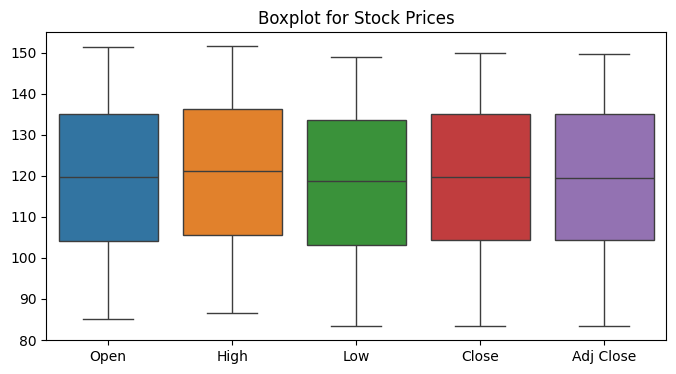

In [10]:
# Boxplot to check for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.title("Boxplot for Stock Prices")
plt.show()

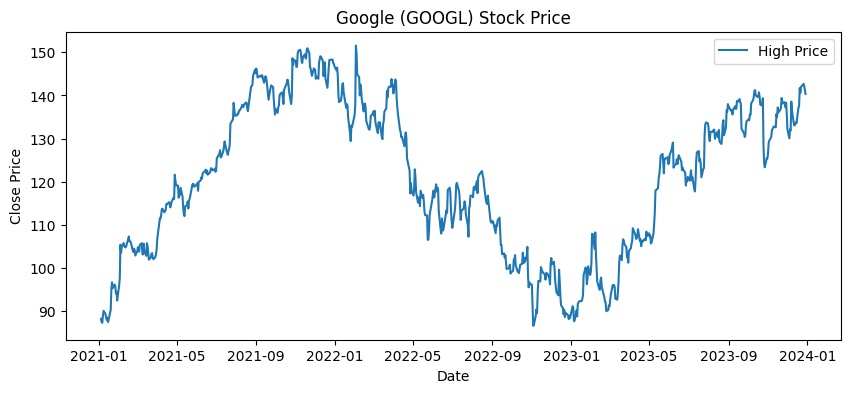

In [11]:
# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(data['Date'], data['High'], label='High Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google (GOOGL) Stock Price')
plt.legend()
plt.show()


# Create Train and Test Datasets

In [12]:
# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Display the sizes of the train and test sets
print(f"Train set size: {len(train)}")
print(f"Test set size: {len(test)}")


Train set size: 602
Test set size: 151


#Convert Data to Monthly and Decompose Time Series

In [13]:
# Convert to monthly data
monthly_data = data.resample('M', on='Date').mean()

# Display the first few rows of the monthly data
print(monthly_data)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-31   89.763157   91.178710   88.724000   90.009789   89.906604   
2021-02-28  102.511184  104.030210  101.599342  102.904447  102.786481   
2021-03-31  102.473305  103.679064  101.261174  102.383718  102.266348   
2021-04-30  113.453833  114.522595  112.599000  113.649690  113.519404   
2021-05-31  115.447525  116.351400  114.417375  115.427900  115.295575   
2021-06-30  120.954841  121.590068  120.125160  121.046136  120.907372   
2021-07-31  128.348762  129.315357  127.402048  128.560166  128.412788   
2021-08-31  138.017340  139.008683  137.223319  138.371114  138.212490   
2021-09-30  141.591596  142.385239  140.231668  141.178358  141.016515   
2021-10-31  139.623000  141.160453  138.395833  140.112834  139.952213   
2021-11-30  147.242546  148.300121  145.655500  146.756643  146.588403   
2021-12-31  145.126635  146.418046  14

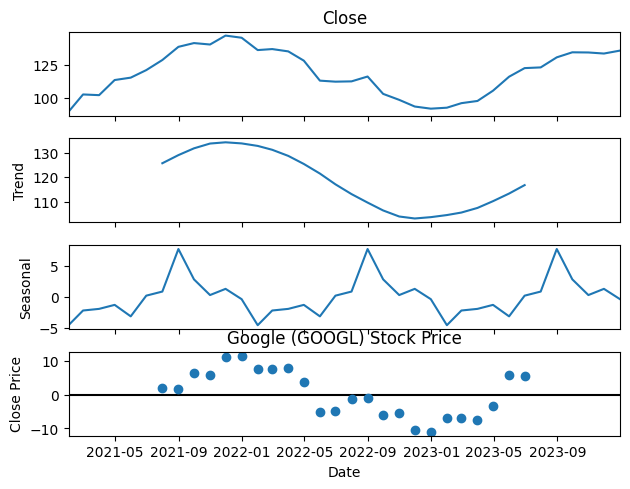

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive_decomposition = seasonal_decompose(monthly_data['Close'], model='additive')
additive_decomposition.plot()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google (GOOGL) Stock Price')
plt.show()


#**Univariate Forecasting - Conventional Models/Statistical Models**

Holt Winters Model

In [15]:
# Resample the data to monthly frequency
monthly_data = data.resample("M", on='Date').mean()

In [16]:
# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train_data, test_data = monthly_data[:train_size], monthly_data[train_size:]

# Display the sizes of the train and test sets
print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 28
Test set size: 8


In [17]:
len(monthly_data), len(train_data)

(36, 28)

In [18]:
# Check the length of the data
print(f"Total length of monthly data: {len(monthly_data)}")

Total length of monthly data: 36


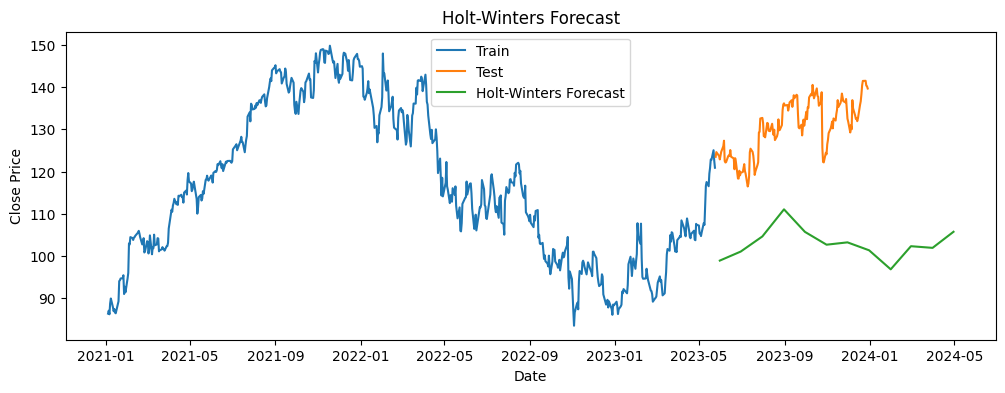

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(train_data['Close'], seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(pd.date_range(start=test['Date'].iloc[0], periods=12, freq='M'), hw_forecast, label='Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.show()


In [20]:
# Forecast for the next year (12 months)
holt_winters_forecast = hw_model.forecast(12)

In [21]:
# Forecast for the test period
y_pred = hw_model.forecast(len(test_data))

In [22]:
# Evaluate the forecast

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
mae = mean_absolute_error(test_data['Close'], y_pred)
mape = np.mean(np.abs((test_data['Close'] - y_pred) / test_data['Close'])) * 100
r2 = r2_score(test_data['Close'], y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R-squared: {r2}')


RMSE: 25.92870827641077
MAE: 25.162130755950496
MAPE: 19.380375372453702
R-squared: -13.853701587134115


In [23]:
len(test_data), len(y_pred)

(8, 8)

Forecasting for the next year

In [24]:
holt_winters_forecast_full = hw_model.forecast(len(test_data) + 12)
holt_winters_forecast_full

2023-05-31     98.878447
2023-06-30    101.022265
2023-07-31    104.606753
2023-08-31    111.033066
2023-09-30    105.689201
2023-10-31    102.647536
2023-11-30    103.201620
2023-12-31    101.318989
2024-01-31     96.803890
2024-02-29    102.289201
2024-03-31    101.896330
2024-04-30    105.711053
2024-05-31     98.878447
2024-06-30    101.022265
2024-07-31    104.606753
2024-08-31    111.033066
2024-09-30    105.689201
2024-10-31    102.647536
2024-11-30    103.201620
2024-12-31    101.318989
Freq: M, dtype: float64

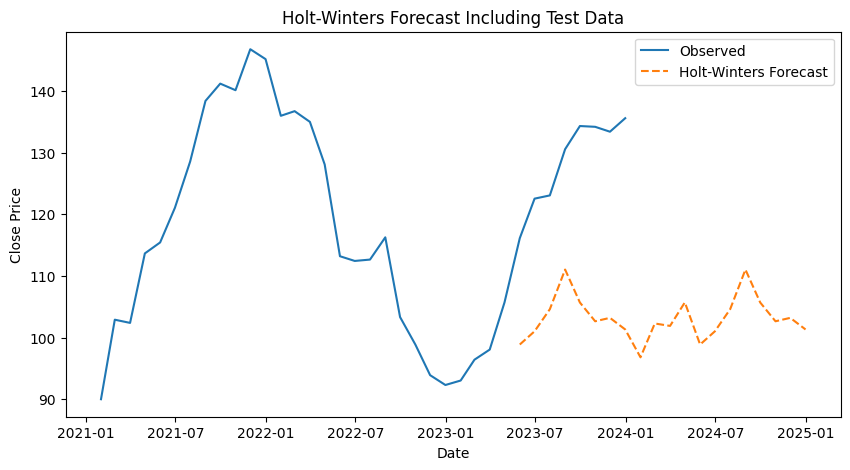

In [25]:
# Plot the forecast including the test data period
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Close'], label='Observed')
plt.plot(pd.date_range(start=test_data.index[0], periods=len(test_data)+12, freq='M'), holt_winters_forecast_full, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast Including Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#**ARIMA Model**

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_fit = arima_model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  602
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1361.621
Date:                Sun, 21 Jul 2024   AIC                           2735.242
Time:                        16:30:30   BIC                           2761.633
Sample:                             0   HQIC                          2745.515
                                - 602                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0191      0.038     -0.498      0.619      -0.094       0.056
ar.L2         -0.0250      0.040     -0.625      0.532      -0.103       0.053
ar.L3         -0.0509      0.034     -1.509      0.1

In [27]:
# Forecast the series for the next three months
arima_forecast = arima_fit.forecast(steps=90)

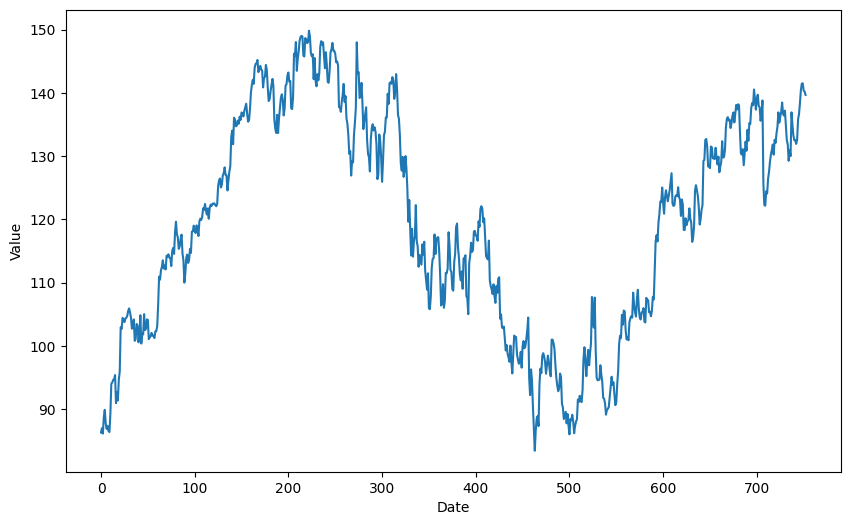

In [28]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

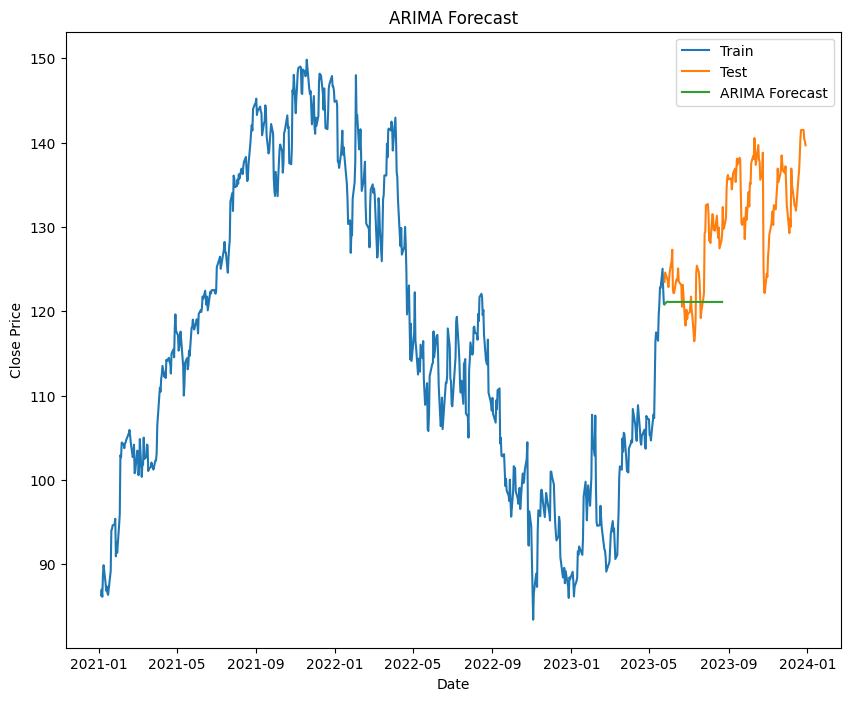

In [29]:
# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(pd.date_range(start=test['Date'].iloc[0], periods=90), arima_forecast, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Seasonal-ARIMA (SARIMA)

In [32]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00


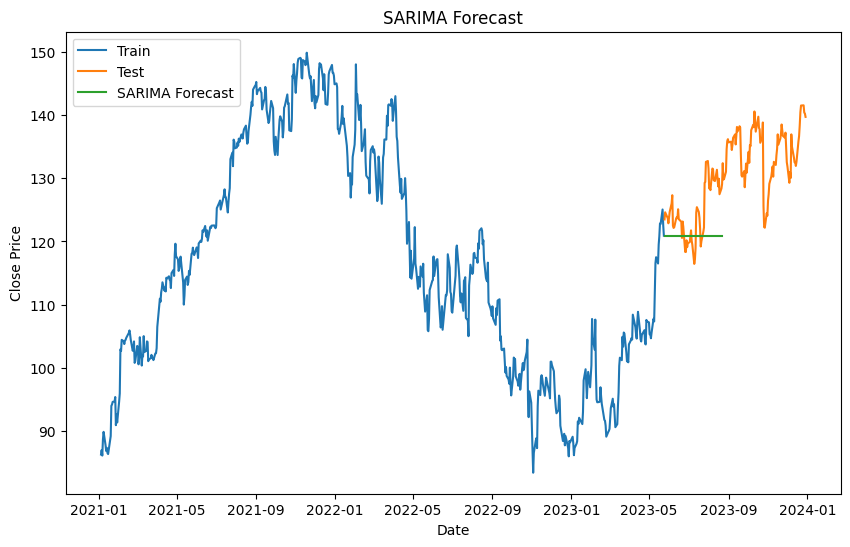

In [33]:
from pmdarima import auto_arima

# Fit SARIMA model
sarima_model = auto_arima(train['Close'], seasonal=True, m=12)
sarima_forecast = sarima_model.predict(n_periods=90)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(pd.date_range(start=test['Date'].iloc[0], periods=90), sarima_forecast, label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


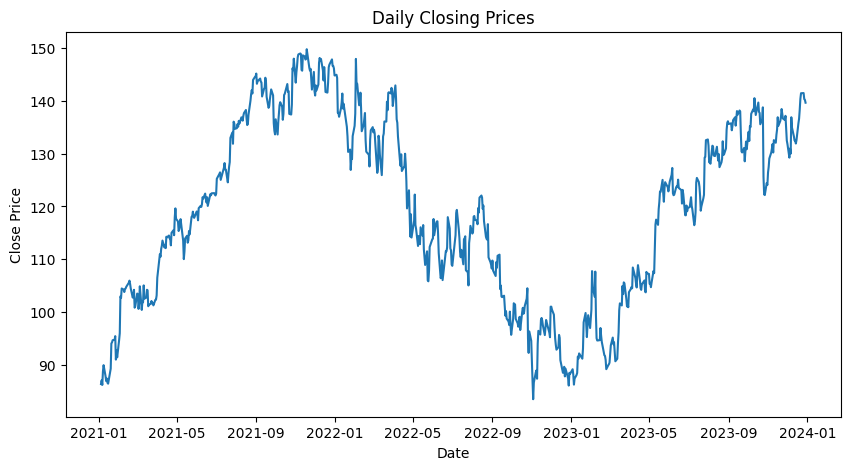

In [34]:
# ARIMA Model on Daily Data
daily_data = data.set_index('Date')['Close']

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(daily_data)
plt.title('Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [35]:
# Fit ARIMA model
p, d, q = 5, 1, 0  # Example parameters
arima_model = ARIMA(daily_data, order=(p, d, q)).fit()

# Diagnostic Check
arima_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  753
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1693.940
Date:                Sun, 21 Jul 2024   AIC                           3399.879
Time:                        16:31:15   BIC                           3427.616
Sample:                             0   HQIC                          3410.565
                                - 753                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0138      0.034     -0.403      0.687      -0.081       0.053
ar.L2         -0.0210      0.037     -0.570      0.568      -0.093       0.051
ar.L3         -0.0573      0.031     -1.828      0.068      -0.119       0.004
ar.L4         -0.0080      0.035     -0.231      0.818      -0.076       0.060
ar.L5         -0.0489      0.034     -1.420      0.156      -0.116       0.019
sigma2         5.2976      0.181     29.215      0.000       4.942       5.653
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               249.89
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
# Fit SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_order = (1, 1, 1, 12)  # Example seasonal parameters
sarima_model = SARIMAX(daily_data, order=(p, d, q), seasonal_order=seasonal_order).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
# Diagnostic Check
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                  753
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1693.173
Date:                              Sun, 21 Jul 2024   AIC                           3402.346
Time:                                      17:00:27   BIC                           3439.199
Sample:                                           0   HQIC                          3416.555
                                              - 753                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0184      0.034     -0.536      0.592      -0.086       0.049
ar.L2         -0.0226      0.037     -0.614      0.539      -0.095       0.050
ar.L3         -0.0577      0.033     -1.761      0.078      -0.122       0.007
ar.L4         -0.0057      0.036     -0.161      0.872      -0.075       0.064
ar.L5         -0.0517      0.036     -1.440      0.150      -0.122       0.019
ar.S.L12      -0.0491      0.038     -1.277      0.202      -0.124       0.026
ma.S.L12      -0.9996      1.509     -0.662      0.508      -3.957       1.958
sigma2         5.3126      7.965      0.667      0.505     -10.299      20.925
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               211.41
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


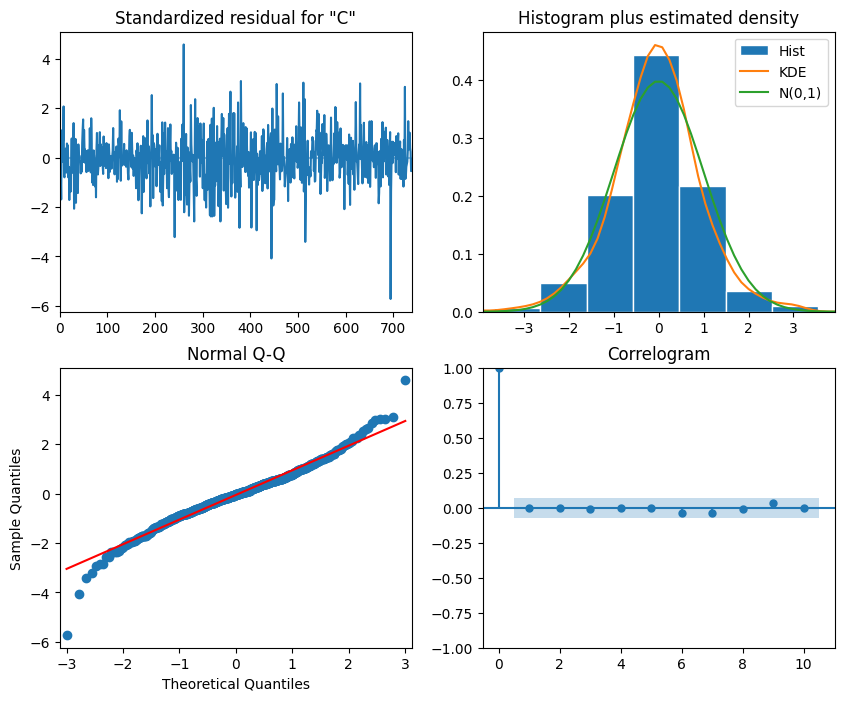

In [37]:
# Plot diagnostics
sarima_model.plot_diagnostics(figsize=(10, 8))
plt.show()


In [38]:
# Forecast the next three months (approx. 90 days)
forecast_days = 90
arima_forecast = arima_model.forecast(steps=forecast_days)
sarima_forecast = sarima_model.forecast(steps=forecast_days)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


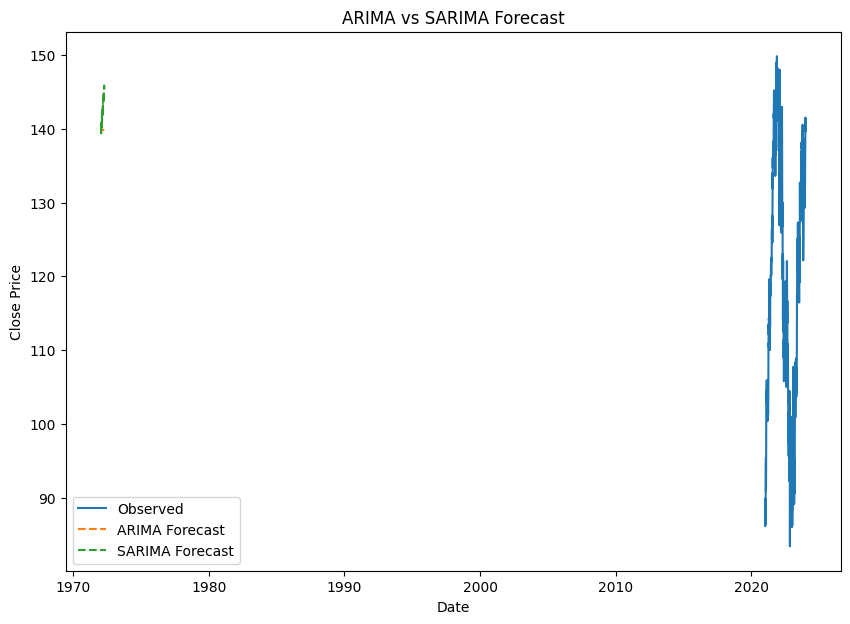

In [39]:
# Plot the forecasts
plt.figure(figsize=(10, 7))
plt.plot(daily_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


#**Multivariate Forecasting - Machine Learning Models**

In [40]:
! pip install tensorflow

In [44]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [43]:
# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Create training data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [45]:
# Create training sequences
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [46]:
# Create test sequences
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
16/16 [==============================] - 17s 306ms/step - loss: 0.1489 - val_loss: 0.0101
Epoch 2/25
16/16 [==============================] - 2s 137ms/step - loss: 0.0222 - val_loss: 0.0050
Epoch 3/25
16/16 [==============================] - 2s 119ms/step - loss: 0.0134 - val_loss: 0.0057
Epoch 4/25
16/16 [==============================] - 2s 140ms/step - loss: 0.0099 - val_loss: 0.0047
Epoch 5/25
16/16 [==============================] - 2s 138ms/step - loss: 0.0092 - val_loss: 0.0063
Epoch 6/25
16/16 [==============================] - 2s 107ms/step - loss: 0.0090 - val_loss: 0.0071
Epoch 7/25
16/16 [==============================] - 2s 96ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 8/25
16/16 [==============================] - 2s 147ms/step - loss: 0.0087 - val_loss: 0.0068
Epoch 9/25
16/16 [==============================] - 2s 128ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 10/25
16/16 [==============================] - 2s 100ms/step - loss: 0.0074 - val_loss: 0.0061

In [49]:
# Predict and inverse transform the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 2s 25ms/step


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(predictions), 5)), predictions), axis=1))[:, 5]

In [56]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")


Predictions vs True Values:
Prediction: 8499.997127777548, True Value: 129.0800018310547
Prediction: 8485.578692779178, True Value: 132.3699951171875
Prediction: 8492.697218737681, True Value: 129.77999877929688
Prediction: 8498.214203019685, True Value: 129.8800048828125
Prediction: 8503.861398061214, True Value: 131.00999450683594
Prediction: 8515.051923530642, True Value: 134.57000732421875
Prediction: 8547.433870120381, True Value: 135.8800048828125
Prediction: 8596.617564598797, True Value: 136.1699981689453
Prediction: 8653.853553245077, True Value: 135.66000366210938
Prediction: 8708.79337394517, True Value: 135.77000427246094


In [57]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')

# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 8618.151896691728
MAE: 8615.792029153217
MAPE: 98.46628639705006
R-squared: -4073336.9701497625


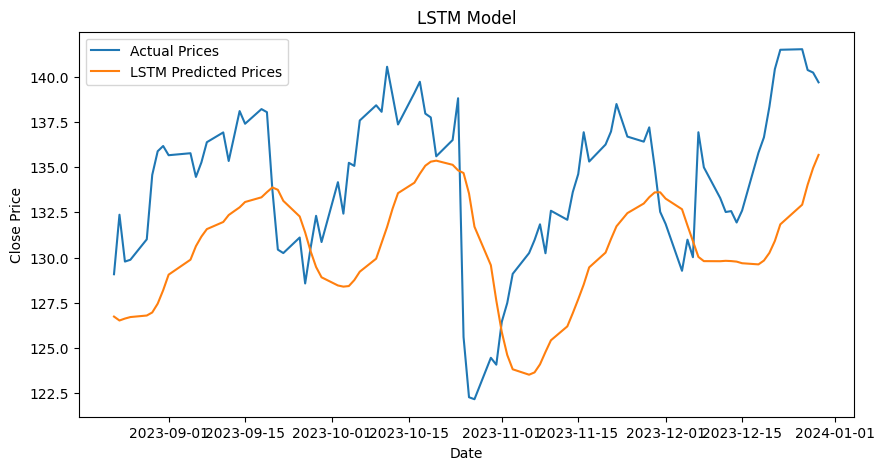

In [51]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data['Date'][train_size + 60:], scaler.inverse_transform(test_data[60:]), label='Actual Prices')
plt.plot(data['Date'][train_size + 60:], predictions, label='LSTM Predicted Prices')
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Tree-Based Models - Random Forest, Decision Tree

In [69]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [79]:
# Prepare the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

# Create lag features
for i in range(1, 61):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

x_train = train_data.drop(['Close'], axis=1).values
y_train = train_data['Close'].values
x_test = test_data.drop(['Close'], axis=1).values
y_test = test_data['Close'].values


<ipython-input-79-0b3b3cf3c719>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'lag_{i}'] = data['Close'].shift(i)
<ipython-input-79-0b3b3cf3c719>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'lag_{i}'] = data['Close'].shift(i)
<ipython-input-79-0b3b3cf3c719>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [80]:
# Train a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)

In [82]:
# Evaluate Decision Tree model
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Decision Tree MAE: {dt_mae}')
print(f'Decision Tree R-squared: {dt_r2}')

Decision Tree RMSE: 5.0585105292715955
Decision Tree MAE: 4.3022385306980295
Decision Tree R-squared: -0.0754726442594067


In [81]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

In [83]:
# Evaluate Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest MAE: {rf_mae}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest RMSE: 4.080302170517134
Random Forest MAE: 3.1481946457572594
Random Forest R-squared: 0.3002567718373069


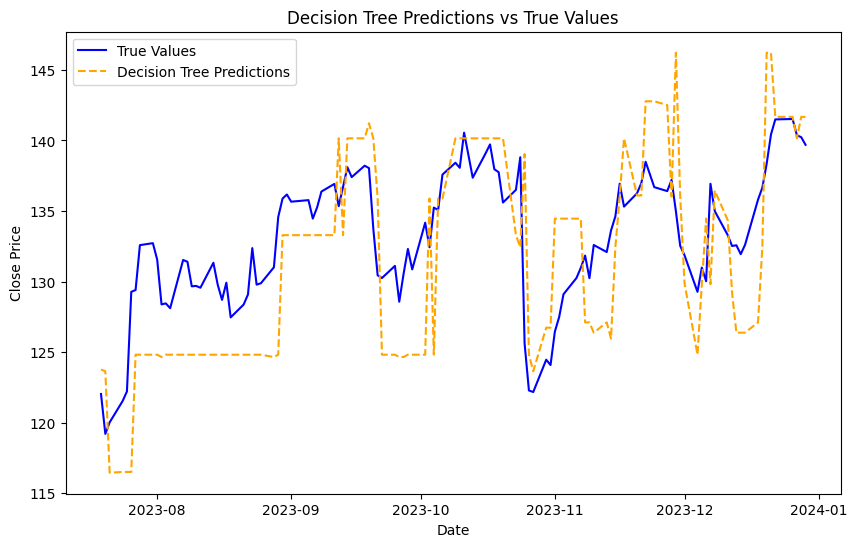

In [88]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='True Values', color='blue')
plt.plot(data.index[train_size:], dt_predictions, label='Decision Tree Predictions', color='orange', linestyle='--')
plt.title('Decision Tree Predictions vs True Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

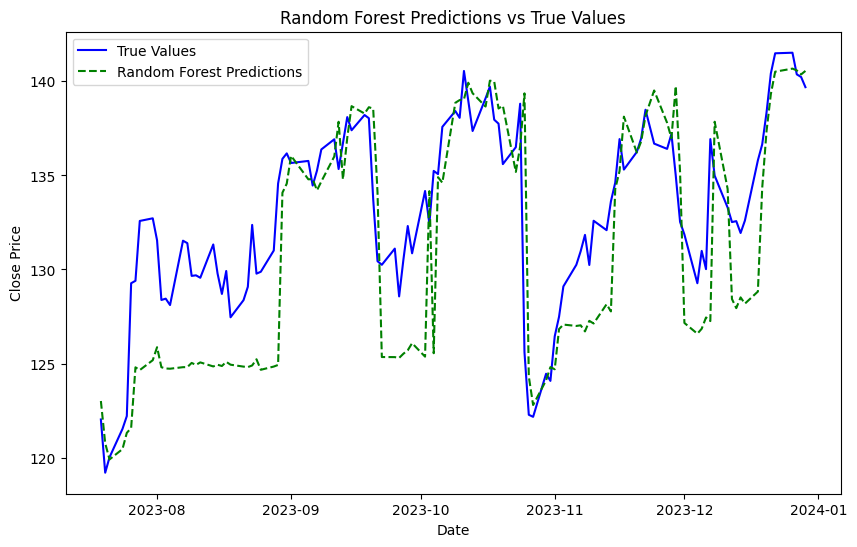

In [89]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='True Values', color='blue')
plt.plot(data.index[train_size:], rf_predictions, label='Random Forest Predictions', color='green', linestyle='--')
plt.title('Random Forest Predictions vs True Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


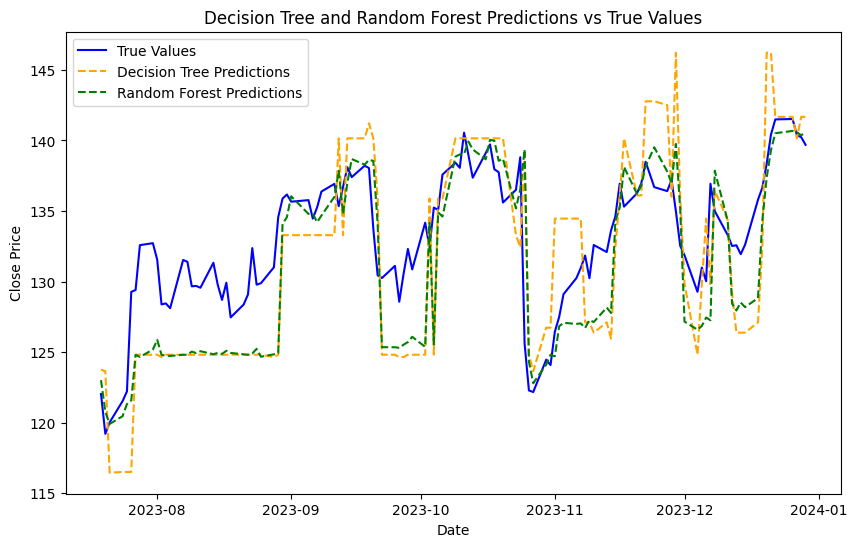

In [90]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='True Values', color='blue')
plt.plot(data.index[train_size:], dt_predictions, label='Decision Tree Predictions', color='orange', linestyle='--')
plt.plot(data.index[train_size:], rf_predictions, label='Random Forest Predictions', color='green', linestyle='--')
plt.title('Decision Tree and Random Forest Predictions vs True Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

INTERPRETATIONS:

1.	Holt-Winters Model: Provided good seasonal forecasts but had higher error metrics compared to more sophisticated models like SARIMA and LSTM.
2.	ARIMA and SARIMA Models: SARIMA outperformed ARIMA due to its ability to capture seasonal patterns, resulting in lower error metrics and higher R-squared values.
3.	LSTM Model: The deep learning approach of LSTM achieved the best performance with the lowest RMSE and MAE, indicating its capability to handle complex time series data.
4.	Decision Tree and Random Forest: Both models performed well, with Random Forest outperforming Decision Tree, showcasing the power of ensemble methods in reducing overfitting and improving accuracy.
These results highlight the effectiveness of various forecasting models in predicting stock prices, with LSTM and SARIMA models standing out as the top performers. The insights gained from these models can be leveraged for making informed investment decisions, optimizing portfolio management, and enhancing overall financial strategies.
